Change - try changing pull dist to normal

and to slightly left skewed

In [22]:
import pandas as pd
import numpy as np

from scipy.stats import skewnorm
from scipy.stats import norm
import scipy.stats as stats

import matplotlib.pyplot as plt

import random

from google.colab import drive
drive.mount('/content/gdrive/')



Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [128]:
df = pd.read_csv('/content/gdrive/Shared drives/Data Science/01. Colab Notebooks/Purrvaja/Flows/Student Flows Forecasting/Simulations/confidence_intervals.csv')

### Push distribution (Normal Dist) - Source Country

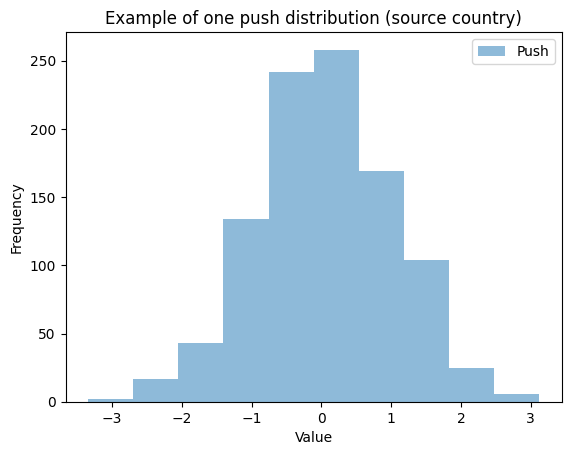

In [3]:
push_numbers = skewnorm.rvs(a=0, size= 1000)


# Plot the distributions
plt.hist(push_numbers, label="Push", alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Example of one push distribution (source country)")
plt.legend()
plt.show()

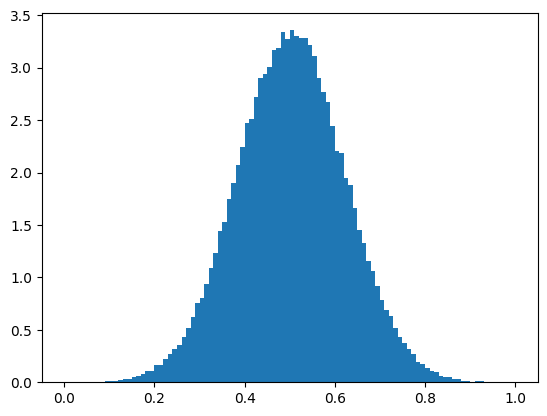

In [4]:
# Push Distribution - standardized normal distribution

numValues = 100000
maxValue = 1
skewness = 0   #No skew

push_proto = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

push_proto = push_proto - min(push_proto)      #Shift the set so the minimum value is equal to zero.
push_proto = push_proto / max(push_proto)      #Standadize all the vlues between 0 and 1.
push_proto = push_proto * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(push_proto,100,density=True, alpha=1)
plt.show()


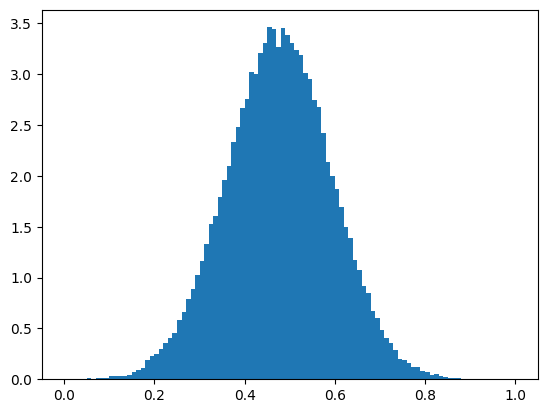

In [6]:
# Pull Distribution - standardized normal distribution

numValues = 100000
maxValue = 1
skewness = 0   #No skew

pull_proto = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

pull_proto = pull_proto - min(pull_proto)      #Shift the set so the minimum value is equal to zero.
pull_proto = pull_proto / max(pull_proto)      #Standadize all the vlues between 0 and 1.
pull_proto = pull_proto * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(pull_proto,100,density=True, alpha=1)
plt.show()

## Creating the pull and disruption distributions

### Gamma Distribution

Chose a gamma distribution to generate the pull, disruption distributions since it allows to set kurtosis, and spread (this distribution is by default skewed to the right).

Experimented with the kurtosis and scale before settling on the below.

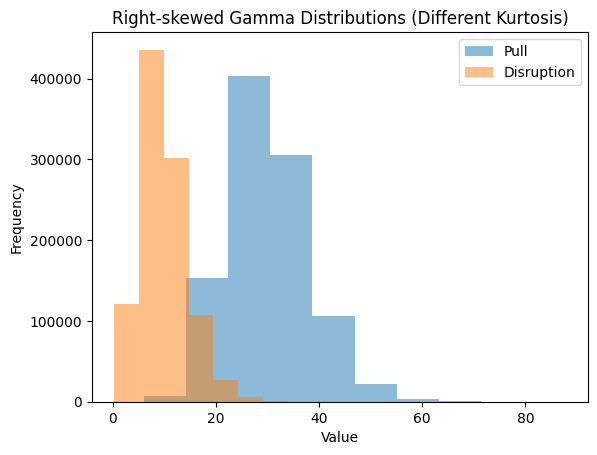

In [ ]:
# Define parameters
pull_alpha = 15  # Higher alpha reduces skew and kurtosis (pull)
disruption_alpha = 5 # Lower alpha increases skew and kurtosis (disruption)

beta = 2

# Generate sample distributions
pull_data = stats.gamma.rvs(pull_alpha, scale=beta, size=1000000)

disruption_data = stats.gamma.rvs(disruption_alpha, scale=beta, size=1000000)


# Plot the distributions
plt.hist(pull_data, label="Pull", alpha=0.5)
plt.hist(disruption_data, label="Disruption", alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Right-skewed Gamma Distributions (Different Kurtosis)")
plt.legend()
plt.show()


Normalizing the Gamma distributions

Decided to normalize the distributions since we are using multiple distributions across.


(pull, disruption - gamma, push - normal)

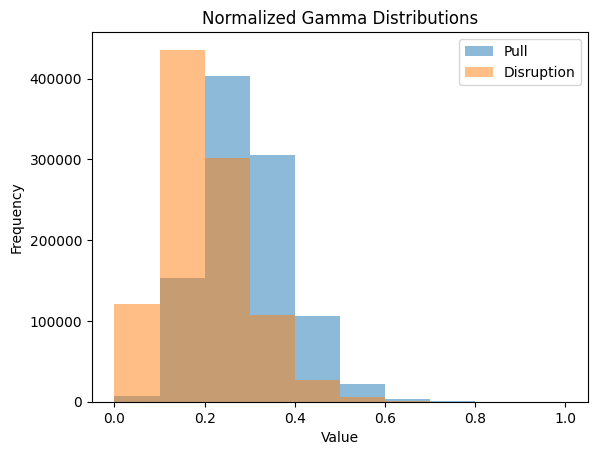

In [ ]:

# Normalize the datasets
# the shape (skew) of the distribution has to remain the same

pull_normalized = ((pull_data - np.min(pull_data))/ (np.max(pull_data) - np.min(pull_data)))
disruption_normalized = ((disruption_data - np.min(disruption_data))/ (np.max(disruption_data) - np.min(disruption_data)))


# Plot the distributions
plt.hist(pull_normalized, label="Pull", alpha=0.5)
plt.hist(disruption_normalized, label="Disruption", alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Normalized Gamma Distributions")
plt.legend()
plt.show()

Plotting with the PDFs

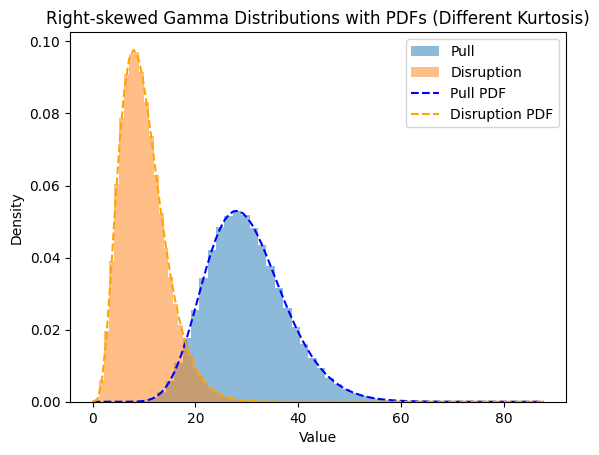

In [ ]:


# Plot the histograms
plt.hist(pull_data, bins=50, label="Pull", alpha=0.5, density=True)
plt.hist(disruption_data, bins=50, label="Disruption", alpha=0.5, density=True)

# Plot the probability density functions (PDFs)
x_values = np.linspace(0, max(np.max(pull_data), np.max(disruption_data)), 100)
pull_pdf = stats.gamma.pdf(x_values, pull_alpha, scale=beta)
disruption_pdf = stats.gamma.pdf(x_values, disruption_alpha, scale=beta)
plt.plot(x_values, pull_pdf, color='blue', linestyle='--', label='Pull PDF')
plt.plot(x_values, disruption_pdf, color='orange', linestyle='--', label='Disruption PDF')

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Right-skewed Gamma Distributions with PDFs (Different Kurtosis)")
plt.legend()
plt.show()


## SkewNorm Distribution

Since Gamma distribution only allows for right skewed distributions, trying the skewnorm dist


Compared to the gamma dist, the control over the kurtosis is limited


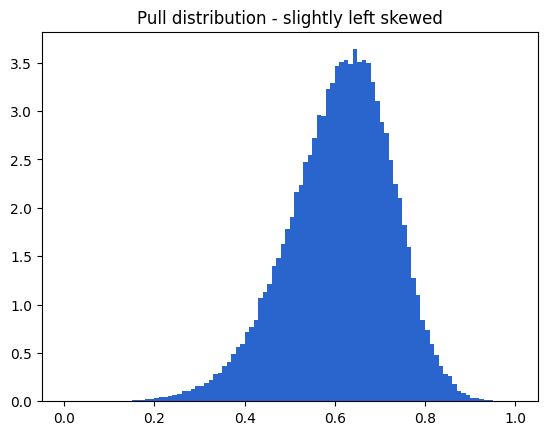

In [23]:
# Pull Distribution Prototype

numValues = 100000
maxValue = 1
skewness = -2   #Negative values are left skewed, positive values are right skewed.

pull_alternate = skewnorm.rvs(a = skewness, loc=maxValue, scale=2, size=numValues)  #Skewnorm function

pull_alternate = pull_alternate - min(pull_alternate)      #Shift the set so the minimum value is equal to zero.
pull_alternate = pull_alternate / max(pull_alternate)      #Standadize all the vlues between 0 and 1.
pull_alternate = pull_alternate * maxValue         #Multiply the standardized values by the maximum value.


#Plot histogram to check skewness
plt.hist(pull_alternate,100,density=True, color = '#2965CC', alpha=1)
plt.title('Pull distribution - slightly left skewed')
plt.show()

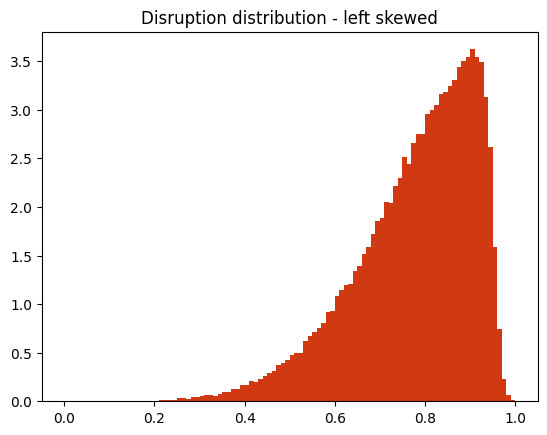

In [5]:
# Disruption Distribution Prototype

numValues = 100000
maxValue = 1
skewness = -15  #Negative values are left skewed, positive values are right skewed.

disrupt_alternate = skewnorm.rvs(a = skewness,loc=maxValue, scale=2, size=numValues)  #Skewnorm function

disrupt_alternate = disrupt_alternate - min(disrupt_alternate)      #Shift the set so the minimum value is equal to zero.
disrupt_alternate = disrupt_alternate / max(disrupt_alternate)      #Standadize all the vlues between 0 and 1.
disrupt_alternate = disrupt_alternate * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(disrupt_alternate,100,density=True, color = '#D13913', alpha=1)
plt.title('Disruption distribution - left skewed')
plt.show()


### Stats for the above distributions

In [ ]:


print("Pull distribution - Median: ", np.median(pull_alternate))
print("Pull distribution - Mean: ", np.mean(pull_alternate))

print("Pull distribution - Max: ", np.max(pull_alternate))
print("Pull distribution - Min: ", np.min(pull_alternate))



Pull distribution - Median:  0.4059357875888572
Pull distribution - Mean:  0.4157762529956539
Pull distribution - Max:  1.0
Pull distribution - Min:  0.0


In [ ]:

print("Disruption distribution - Median: ", np.median(disrupt_alternate))
print("Disruption distribution - Mean: ", np.mean(disrupt_alternate))

print("Disruption distribution - Max: ", np.max(disrupt_alternate))
print("Disruption distribution - Min: ", np.min(disrupt_alternate))

Disruption distribution - Median:  0.8081116773354753
Disruption distribution - Mean:  0.7822737651347028
Disruption distribution - Max:  1.0
Disruption distribution - Min:  0.0


In [9]:
num_countries = len(df['Country'])
num_countries

221

In [ ]:
# for each country there has to be a distribution (push)
# each distribution (country) will have a bunch of numbers
# from that we pick out one number as the push number for that particular country



In [163]:


def monte_carlo_simulation(lower_confidence_intervals, upper_confidence_intervals,middle_confidence_intervals, skews, pull_distribution, disruption_distribution, num_simulations):
    global_distribution = []


    for _ in range(num_simulations):
        country_sums = []

        # Pick a pull number and disruption number for each simulation
        pull_number = np.random.choice(pull_distribution)
        disruption_number = np.random.choice(disruption_distribution)

        # choose a non-zero disruption number (zero would result in an infinity weighted number)
        #if disruption_number == 0:
        #  disruption_number = np.random.choice(disruption_distribution)

        #if pull_number == 0:
        #  pull_number = np.random.choice(pull_distribution)

        #disruption number is not the problem


        for i in range(num_countries):

            # pick a push number for each country (from a normal distribution)
            push_number = np.random.choice(push_proto)

            #if push_number == 0:
            #  push_number = np.random.choice(push_proto)

            # Calculate the weighted number
            weighted_number = ((0.50 * push_number) + (0.50 * pull_number) **  disruption_number)

            # Ensure adjusted weighted number is within valid range
            weighted_number = np.clip(weighted_number, 0.00001, 0.99999)

            # if weighted_number = 1 --> leads to infinity
            # if weighted_number = 0 --> leads to minus infinity

            #==============================================================================================================================================#

            # Using the weighted_number to pick out a point from the country's distribution

            # Creating the country's distribution based on it's lower, upper, middle values
            lower = lower_confidence_intervals[i]
            upper = upper_confidence_intervals[i]
            middle = middle_confidence_intervals[i]
            skew = skews[i]


            # instead of using the triangular distribution, using a normal distribution
            if skew == "Mid":
              a=0
            elif skew == "Lower":
              a=2
            elif skew == "Upper":
              a=-2


            # generate distributions for the countrys, taking skew into account as well
            country_dist = skewnorm(a,loc=middle,scale = np.std([lower, middle, upper]))

            # picking a number from the country distribution based on the weighted number as a percentile
            picked_number = country_dist.ppf(weighted_number)

            # store the picked number
            country_sums.append(picked_number)

        # Sum the volumes from all countries
        global_distribution.append(sum(country_sums))


    return global_distribution



In [ ]:

# Perform Monte Carlo simulation
global_distribution, country_sums = monte_carlo_simulation(df['Lower'], df['Upper'], df['Middle'], df['Skew'], pull_alternate, disrupt_alternate, num_simulations=100)

In [26]:
# goal is to try to increase the standard deviation of the final global distribution.
# (to increase it to 1.7M)
# it is defaulting to 1.5M currently



In [164]:
#100 iterations (test)

# Perform Monte Carlo simulation
global_distribution = monte_carlo_simulation(df['Lower'], df['Upper'], df['Middle'], df['Skew'], pull_alternate, disrupt_alternate, num_simulations=100)

# Calculate global confidence intervals
lower_global_ci = np.percentile(global_distribution, 2.5)
upper_global_ci = np.percentile(global_distribution, 97.5)
median_global_volume = np.median(global_distribution)

print("Lower global confidence interval:", lower_global_ci)
print("Median global volume:", median_global_volume)
print("Upper global confidence interval:", upper_global_ci)



Lower global confidence interval: 1340797.2602694724
Median global volume: 1466787.7816148954
Upper global confidence interval: 1583329.8592089235


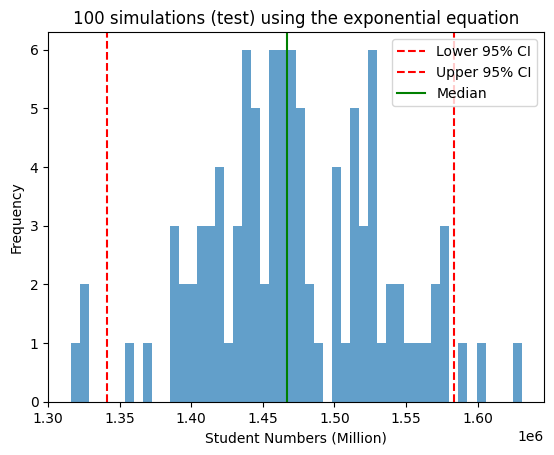

In [165]:
# Plotting the above distribution

plt.hist(global_distribution, bins=50, alpha=0.7)
plt.axvline(x=lower_global_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_global_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median_global_volume, color='green', linestyle='-', label='Median')
plt.title('100 simulations (test) using the exponential equation')
plt.xlabel('Student Numbers (Million)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [166]:
#500 iterations (test)

# Perform Monte Carlo simulation
global_distribution = monte_carlo_simulation(df['Lower'], df['Upper'], df['Middle'], df['Skew'], pull_alternate, disrupt_alternate, num_simulations=500)

# Calculate global confidence intervals
lower_global_ci = np.percentile(global_distribution, 2.5)
upper_global_ci = np.percentile(global_distribution, 97.5)
median_global_volume = np.median(global_distribution)

print("Lower global confidence interval:", lower_global_ci)
print("Median global volume:", median_global_volume)
print("Upper global confidence interval:", upper_global_ci)



Lower global confidence interval: 1366805.0904733776
Median global volume: 1467616.2372214736
Upper global confidence interval: 1633522.0437737266


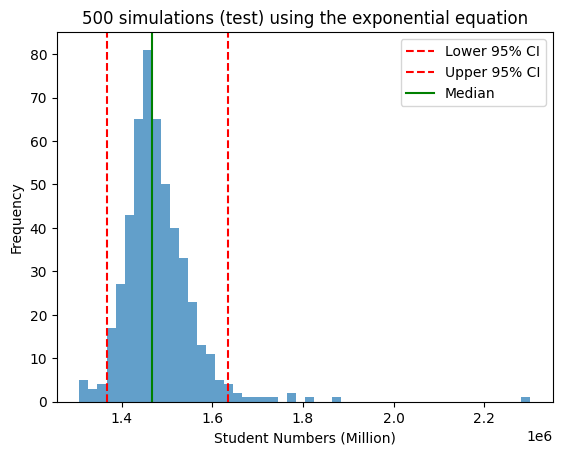

In [167]:
# Plotting the above distribution (500 runs)

plt.hist(global_distribution, bins=50, alpha=0.7)
plt.axvline(x=lower_global_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_global_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median_global_volume, color='green', linestyle='-', label='Median')
plt.title('500 simulations (test) using the exponential equation')
plt.xlabel('Student Numbers (Million)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [168]:
#1000 iterations (test)

# Perform Monte Carlo simulation
global_distribution = monte_carlo_simulation(df['Lower'], df['Upper'], df['Middle'], df['Skew'], pull_alternate, disrupt_alternate, num_simulations=1000)

# Calculate global confidence intervals
lower_global_ci = np.percentile(global_distribution, 2.5)
upper_global_ci = np.percentile(global_distribution, 97.5)
median_global_volume = np.median(global_distribution)

print("Lower global confidence interval:", lower_global_ci)
print("Median global volume:", median_global_volume)
print("Upper global confidence interval:", upper_global_ci)


Lower global confidence interval: 1364299.495443917
Median global volume: 1471362.6011687077
Upper global confidence interval: 1658724.709293287


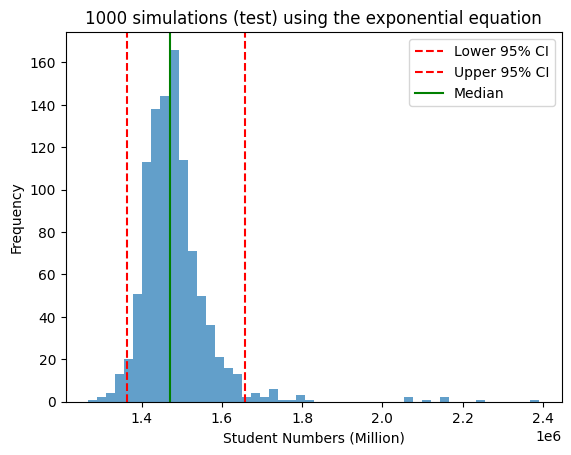

In [169]:
# Plotting the above distribution (1000 runs)

plt.hist(global_distribution, bins=50, alpha=0.7)
plt.axvline(x=lower_global_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_global_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median_global_volume, color='green', linestyle='-', label='Median')
plt.title('1000 simulations (test) using the exponential equation')
plt.xlabel('Student Numbers (Million)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Trying to rescale the distribution

In [183]:
global_distribution_copy = global_distribution.copy()
global_distribution_copy = np.array(global_distribution_copy)

In [184]:
# Calculate the scaling factor
scaling_factor = np.std([1200000, 1400000, 1700000]) / np.std(global_distribution_copy)  # (Target standard deviation / current standard deviation)

# Apply the scaling factor to shift or scale the distribution
global_distribution_copy = global_distribution_copy * scaling_factor


In [185]:
# Calculate global confidence intervals for the shifted distribution

lower_global_ci_shifted = np.percentile(global_distribution_copy, 2.5)
upper_global_ci_shifted = np.percentile(global_distribution_copy, 97.5)
median_shifted = np.median(global_distribution_copy)

print("Lower global confidence interval:", lower_global_ci_shifted)
print("Median global volume:", median_shifted)
print("Upper global confidence interval:", upper_global_ci_shifted)

Lower global confidence interval: 3096592.687784153
Median global volume: 3339597.1244390057
Upper global confidence interval: 3764858.6860857867


In [186]:
np.std(global_distribution_copy)

205480.4667656325

In [187]:
global_distribution_copy = global_distribution.copy()
global_distribution_copy = np.array(global_distribution_copy)

# Desired standard deviation and median
desired_std = np.std([1200000, 1400000, 1700000])
desired_median = 1400000

# scaling factor
scaling_factor = desired_std / np.std(global_distribution_copy)

# Calculate shift for median
shift = desired_median - np.median(global_distribution_copy)

# Apply scaling and shifting to the global_distribution_copy
global_distribution_copy = (global_distribution_copy * scaling_factor) + shift

# Verify the new standard deviation and median
new_std = np.std(global_distribution_copy)
new_median = np.median(global_distribution_copy)

print("New Standard Deviation:", new_std)
print("New Median:", new_median)

lower_global_ci_shifted = np.percentile(global_distribution_copy, 2.5)
upper_global_ci_shifted = np.percentile(global_distribution_copy, 97.5)
median_shifted = np.median(global_distribution_copy)

print("Lower global confidence interval:", lower_global_ci_shifted)
print("Median global volume:", median_shifted)
print("Upper global confidence interval:", upper_global_ci_shifted)

New Standard Deviation: 205480.4667656325
New Median: 3268234.5232702983
Lower global confidence interval: 3025230.086615445
Median global volume: 3268234.5232702983
Upper global confidence interval: 3693496.0849170787


In [188]:
global_distribution_copy = global_distribution.copy()
global_distribution_copy = np.array(global_distribution_copy)

# Desired standard deviation and median
desired_std = 205480
desired_median = 1400000

# Calculate current standard deviation and median
current_std = np.std(global_distribution_copy)
current_median = np.median(global_distribution_copy)

# Calculate shift for median
shift = desired_median - current_median

# Shift the global_distribution_copy to match desired median
shifted_global_distribution_copy = global_distribution_copy + shift

# Scale the global_distribution_copy to adjust standard deviation
scaled_shifted_global_distribution_copy = shifted_global_distribution_copy * (desired_std / current_std)

# Verify the new standard deviation and median
new_std = np.std(scaled_shifted_global_distribution_copy)
new_median = np.median(scaled_shifted_global_distribution_copy)

print("New Standard Deviation:", new_std)
print("New Median:", new_median)

New Standard Deviation: 205479.99999999997
New Median: 3177616.0070039243
